In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/titanic/train.csv", index_col=0)
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# 删除缺失值过多的列，和观察判断对预测无关的列
data.drop(["Cabin", "Name", "Ticket"], inplace=True, axis=1)
# 用均值填充年龄
data["Age"] = data["Age"].fillna(data["Age"].mean())
#  将性别转为数值类型，男性为1，女性为0
data["Sex"] = (data["Sex"] == "male").astype(int) 

In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 59.0+ KB


In [10]:
labels = data["Embarked"].unique().tolist()
labels

[0, 1, 2]

In [11]:
data["Embarked"] = data["Embarked"].apply(lambda x : labels.index(x))
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0
2,1,1,0,38.000000,1,0,71.2833,1
3,1,3,0,26.000000,0,0,7.9250,0
4,1,1,0,35.000000,1,0,53.1000,0
5,0,3,1,35.000000,0,0,8.0500,0
6,0,3,1,29.699118,0,0,8.4583,2
7,0,1,1,54.000000,0,0,51.8625,0
8,0,3,1,2.000000,3,1,21.0750,0
9,1,3,0,27.000000,0,2,11.1333,0


In [12]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.0 KB


In [13]:
# 提取特征
X = data.iloc[:, data.columns != "Survived"]
y = data.iloc[:, data.columns == "Survived"]

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [ ]:
Xtrain

In [16]:
for i in [Xtrain, Xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,18.000000,0,0,11.500,0
1,1,0,30.000000,0,0,31.000,1
2,3,0,21.000000,1,0,9.825,0
3,3,0,29.699118,0,0,7.750,2
4,3,1,22.000000,0,0,8.050,0
...,...,...,...,...,...,...,...
617,3,1,29.699118,0,0,8.050,0
618,3,1,22.000000,0,0,9.000,0
619,1,1,45.000000,0,0,26.550,0
620,3,0,3.000000,3,1,21.075,0


In [42]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(Xtrain, ytrain)
score_ = clf.score(Xtest, ytest)
score_

0.7715355805243446

In [44]:
score = cross_val_score(clf, X, y, cv=10).mean()
score

0.7818181818181819

0.8177860061287026


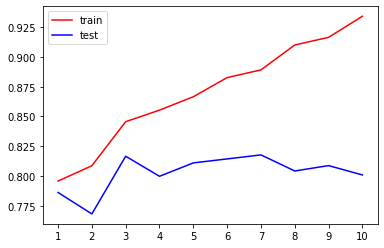

In [46]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy"
    )
    clf = clf.fit(Xtrain, ytrain)
    score_tr = clf.score(Xtrain,ytrain)
    score_te = cross_val_score(clf, X, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()